### Imports

In [16]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn
import librosa
import librosa.display
from IPython.display import Audio
import numpy as np
import scipy
import sklearn
import os, requests

/home/dmngo/.local/lib/python3.7/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
/home/dmngo/.local/lib/python3.7/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit


### Retrieve the 10 selected 90's East Coast songs

In [17]:
# 1 minute chunk of each song offset by 1 minute, because intros vary from rest of the song

x1, sr1 = librosa.load("songs/Ain't The Devil Happy.mp3",duration=60,offset=60) 
x2, sr2 = librosa.load("songs/Brooklyn's Finest.mp3",duration=60,offset=60)
x3, sr3 = librosa.load("songs/C.R.E.A.M..mp3",duration=60,offset=60)
x4, sr4 = librosa.load("songs/Dangerous Mindz.mp3",duration=60,offset=60)
x5, sr5 = librosa.load("songs/Juicy.mp3",duration=60,offset=60)
x6, sr6 = librosa.load("songs/Shadowboxin'.mp3",duration=60,offset=60)
x7, sr7 = librosa.load("songs/Survival of The Fittest.mp3",duration=60,offset=60)
x8, sr8 = librosa.load("songs/The Choice Is Yours.mp3",duration=60,offset=60)
x9, sr9 = librosa.load("songs/The World Is Yours.mp3",duration=60,offset=60)
x10, sr10 = librosa.load("songs/Break Ya Neck.mp3",duration=60,offset=60)

/home/dmngo/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/dmngo/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/dmngo/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/dmngo/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/dmngo/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/dmng

#### Organize songs into list

In [18]:
songs = [(x1,sr1,"Ain't The Devil Happy"),(x2,sr2,"Brooklyn's Finest"),(x3,sr3,'C.R.E.A.M.'),(x4,sr4,'Dangerous Mindz'),(x5,sr5,'Juicy'),(x6,sr6,"Shadowboxin'"),(x7,sr7,'Survival of the Fittest'),(x8,sr8,'The Choice Is Yours'),(x9,sr9,'The World is Yours'),(x10,sr10,'Break Ya Neck')]

#### "Ain't the Devil Happy"

In [19]:
#Audio(x1,rate=sr1)

#### "Brooklyn's Finest"

In [20]:
#Audio(x2,rate=sr2)

#### "C.R.E.A.M."

In [21]:
#Audio(x3,rate=sr3)

#### "Dangerous Mindz"

In [22]:
#Audio(x4,rate=sr4)

#### "Juicy"

In [23]:
#Audio(x5,rate=sr5)

#### "Shadowboxin'"

In [24]:
#Audio(x6,rate=sr6)

#### "Survival of the Fittest"

In [25]:
#Audio(x7,rate=sr7)

#### "The Choice is Yours"

In [26]:
#Audio(x8,rate=sr8)

#### "The World is Yours"

In [27]:
#Audio(x9,rate=sr9)

#### "Break Ya Neck"

In [28]:
#Audio(x10,rate=sr10)

## Wave Plots

Ain't The Devil Happy:


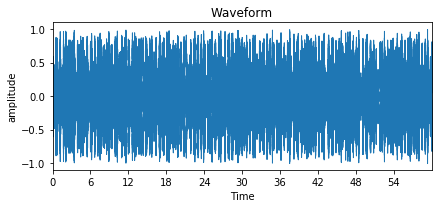

Brooklyn's Finest:


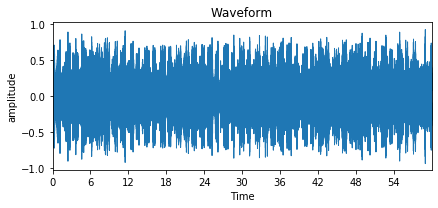

C.R.E.A.M.:


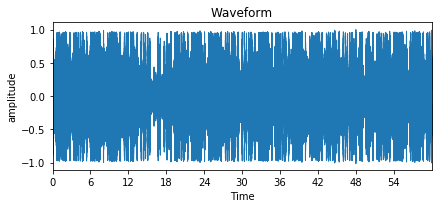

Dangerous Mindz:


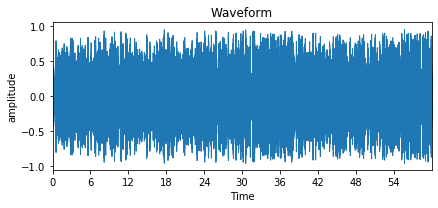

Juicy:


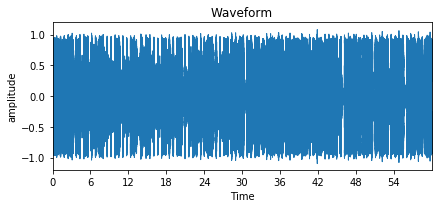

Shadowboxin':


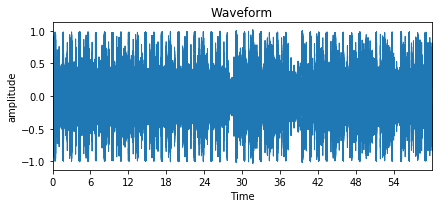

Survival of the Fittest:


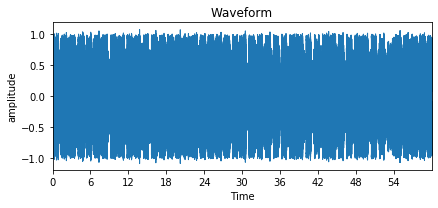

The Choice Is Yours:


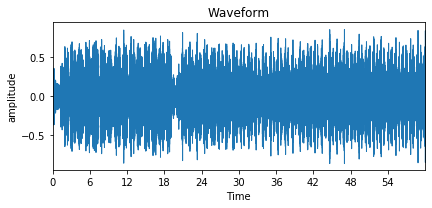

The World is Yours:


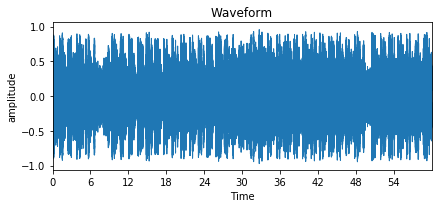

Break Ya Neck:


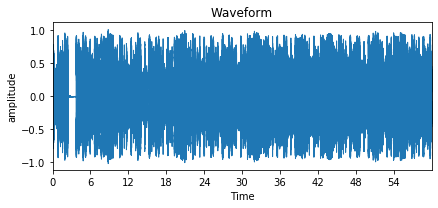

In [29]:
#show wave plot for each song
for song in songs:
    x = song[0]
    sr = song[1]
    plt.figure(figsize=(6,3))
    librosa.display.waveplot(x, sr=sr)
    plt.title('Waveform')
    plt.tight_layout()
    plt.ylabel("amplitude")
    print(song[2]+":")
    plt.show()

## Fourier Transform
### With top notes

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  after removing the cwd from sys.path.


Ain't The Devil Happy:
Top Note: G2


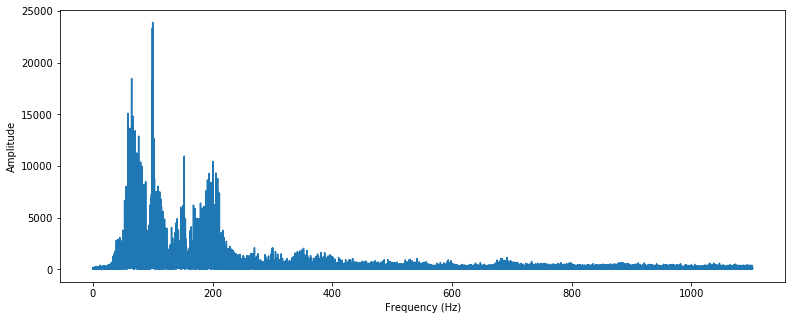

Brooklyn's Finest:
Top Note: G2


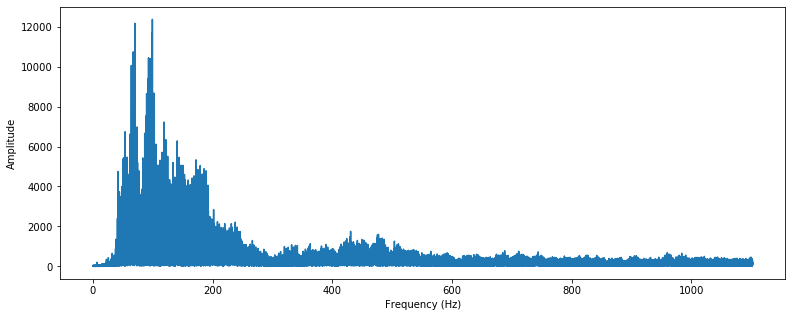

C.R.E.A.M.:
Top Note: F#2


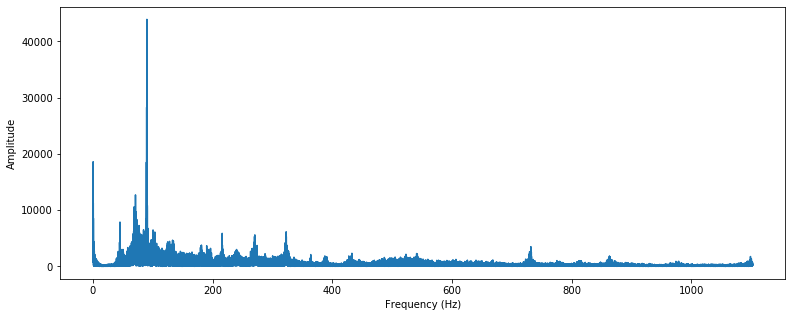

Dangerous Mindz:
Top Note: D#2


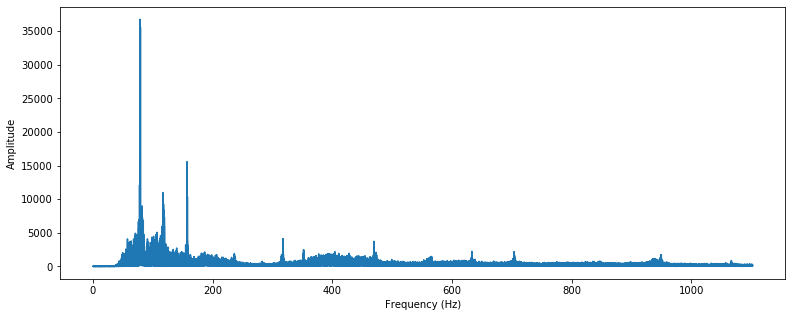

Juicy:
Top Note: D#1


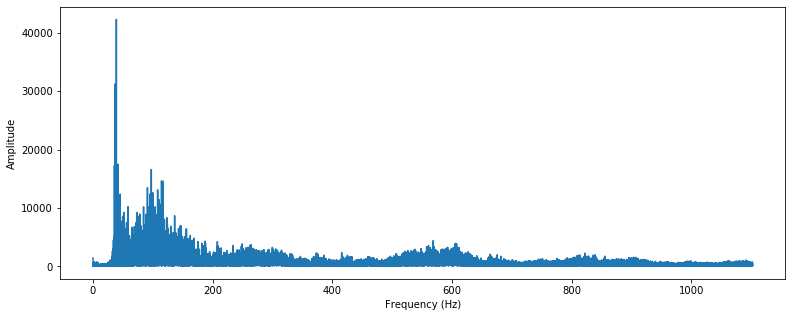

Shadowboxin':
Top Note: F10


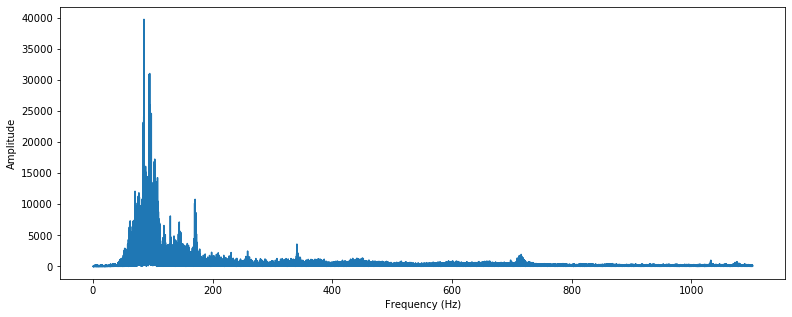

Survival of the Fittest:
Top Note: E1


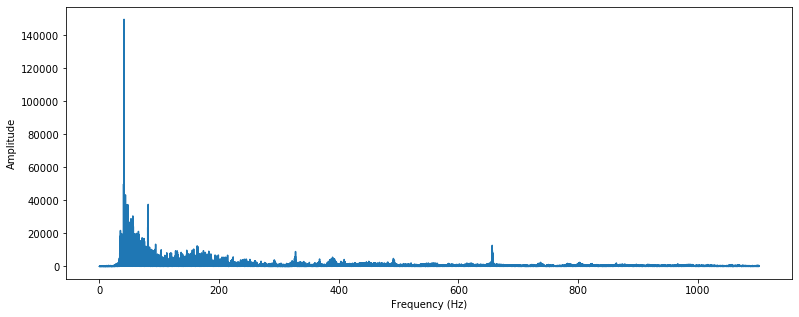

The Choice Is Yours:
Top Note: A#1


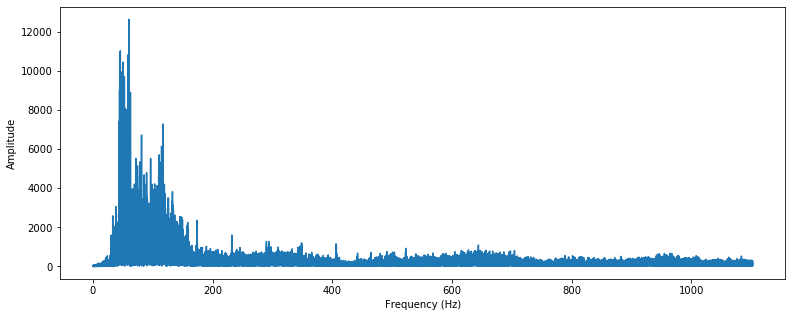

The World is Yours:
Top Note: F10


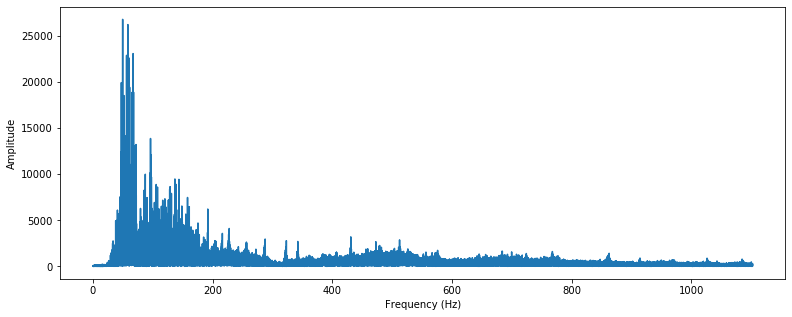

Break Ya Neck:
Top Note: G1


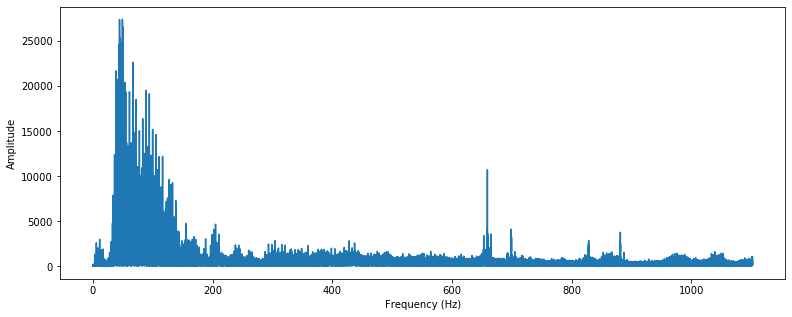

In [31]:
#fourier transformation of each song
for song in songs:
    x = song[0]
    sr = song[1]
    X = scipy.fft(x) # scipy.fft.fft(x) 
    X_mag = np.absolute(X)
    f = np.linspace(0, sr, len(X_mag)) # frequency variable
    plt.figure(figsize=(13, 5))
    plt.plot(f[:66150], X_mag[:66150])
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    print(song[2]+':')
    max_pos = X_mag.argmax()
    print('Top Note: ' + librosa.hz_to_note(f[max_pos]))
    plt.show()

In [32]:
# G2, G2, F#2, D#2, D#1, F10, E1, A#1, F10, G1

## Chroma

Ain't The Devil Happy:


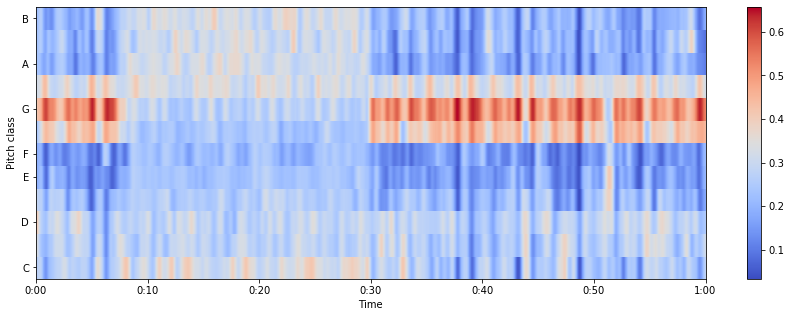

Brooklyn's Finest:


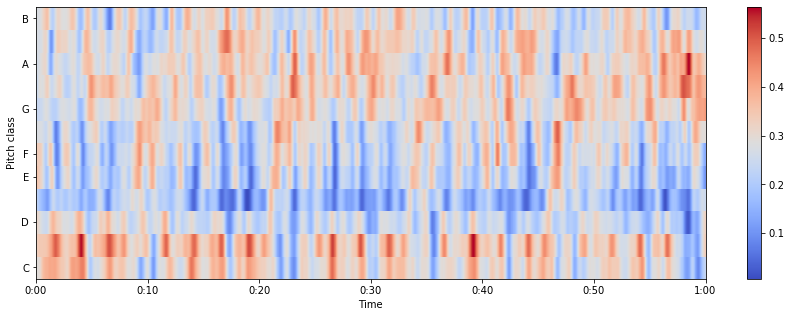

C.R.E.A.M.:


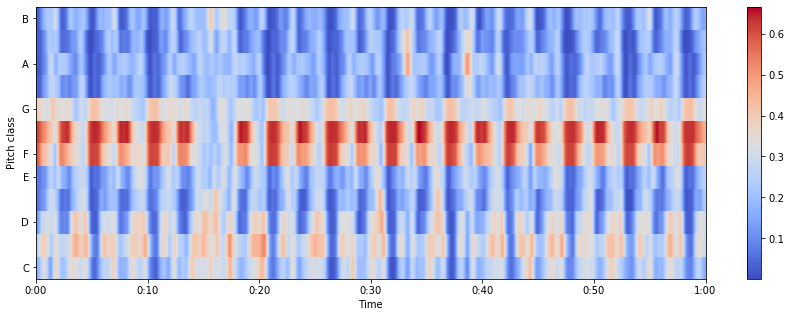

Dangerous Mindz:


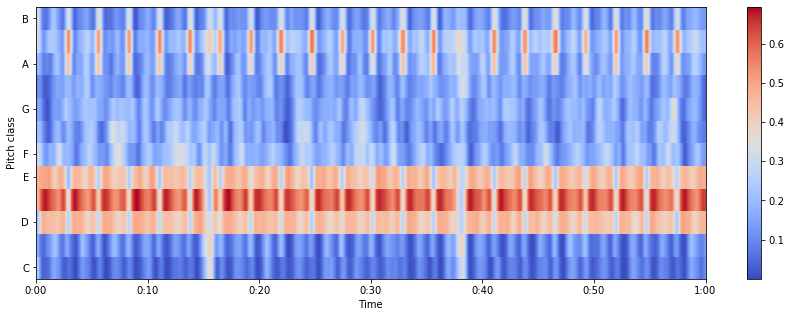

Juicy:


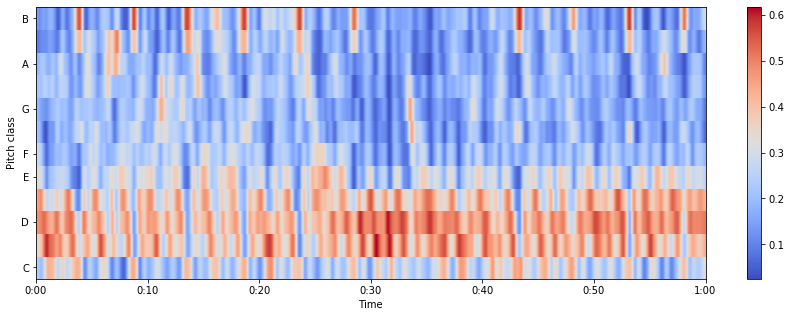

Shadowboxin':


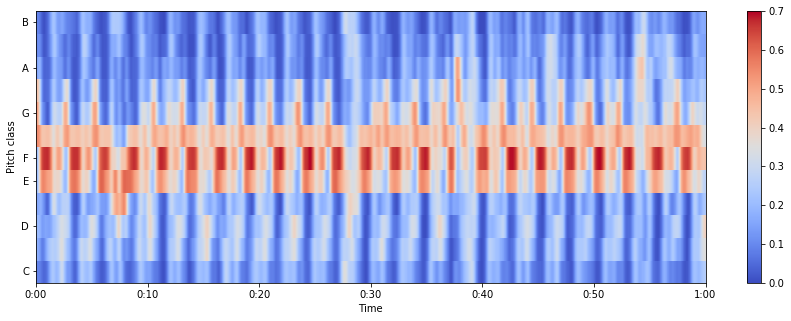

Survival of the Fittest:


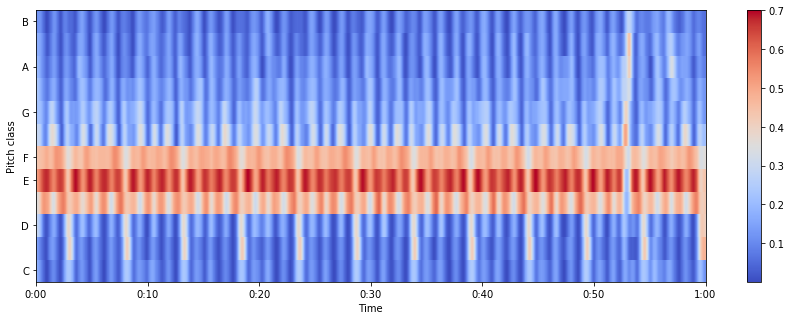

The Choice Is Yours:


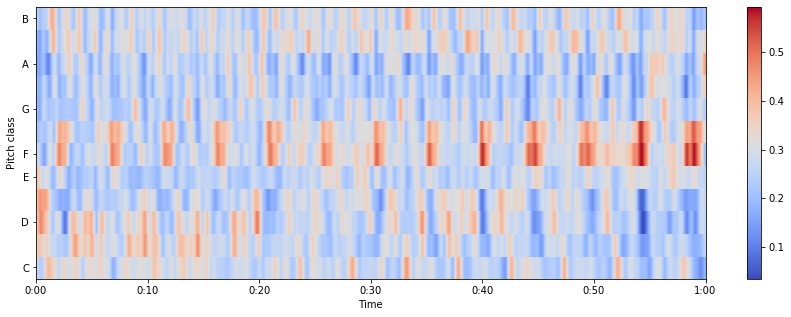

The World is Yours:


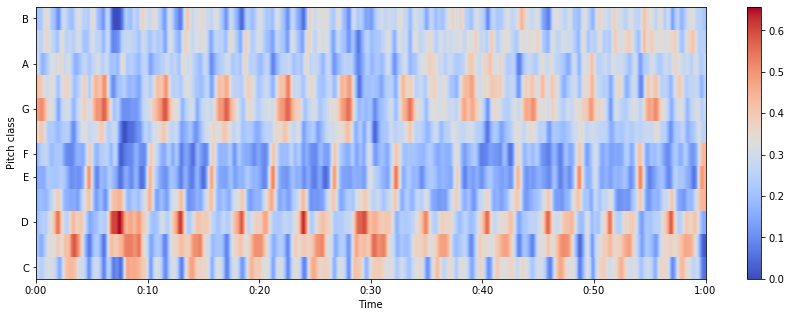

Break Ya Neck:


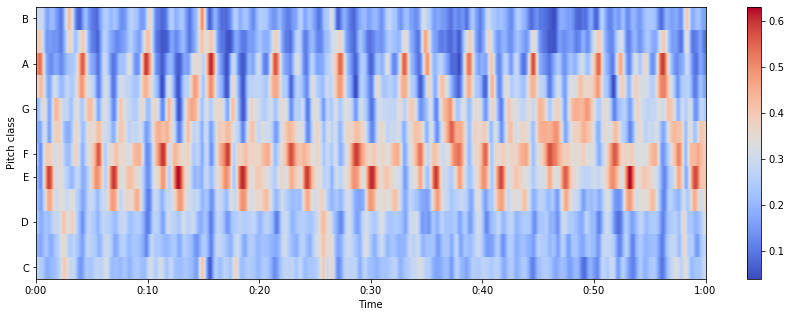

In [33]:
#calculate the chroma graph for each song
for song in songs:
    x = song[0]
    sr = song[1]
    chromagram = librosa.feature.chroma_cens(x, sr=sr, hop_length=512)
    plt.figure(figsize=(15, 5))
    librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=512, cmap='coolwarm')
    print(song[2]+":")
    plt.colorbar()
    plt.show()

## Zero Crossing

In [34]:
#calculate the total number of zero crossings for each song
for song in songs:
    x = song[0]
    print(song[2]+':')
    print('Total # of Zero Crossings: '+ str(sum(librosa.zero_crossings(x, pad=False)))+'\n')

Ain't The Devil Happy:
Total # of Zero Crossings: 169049

Brooklyn's Finest:
Total # of Zero Crossings: 170486

C.R.E.A.M.:
Total # of Zero Crossings: 94326

Dangerous Mindz:
Total # of Zero Crossings: 104763

Juicy:
Total # of Zero Crossings: 121432

Shadowboxin':
Total # of Zero Crossings: 116209

Survival of the Fittest:
Total # of Zero Crossings: 85987

The Choice Is Yours:
Total # of Zero Crossings: 133713

The World is Yours:
Total # of Zero Crossings: 111381

Break Ya Neck:
Total # of Zero Crossings: 139793



In [35]:
#calculate mean zero crossing rate
sum([169049, 170486, 94326, 104763, 121432, 116209, 85987, 133713, 111381, 139793])/10

124713.9

## Spectrogram

Ain't The Devil Happy:


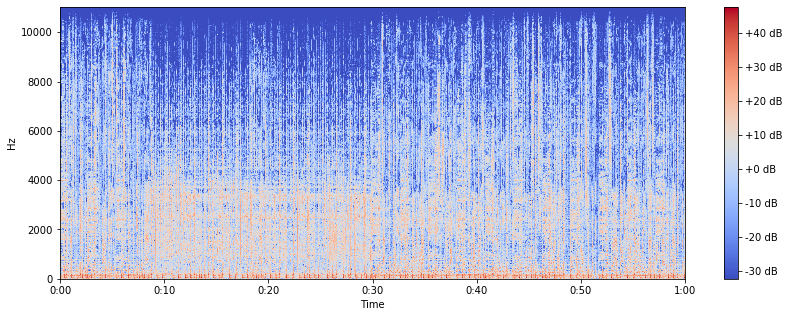

Brooklyn's Finest:


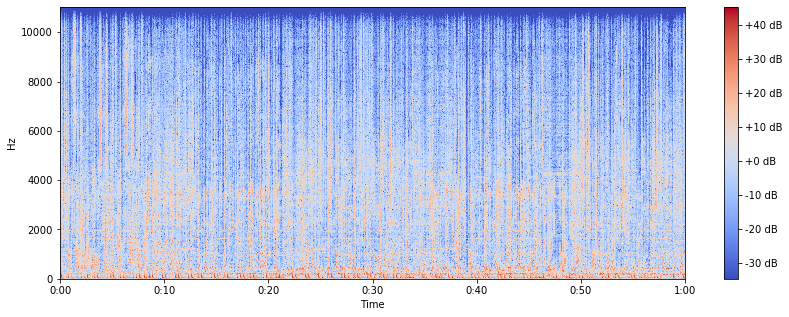

C.R.E.A.M.:


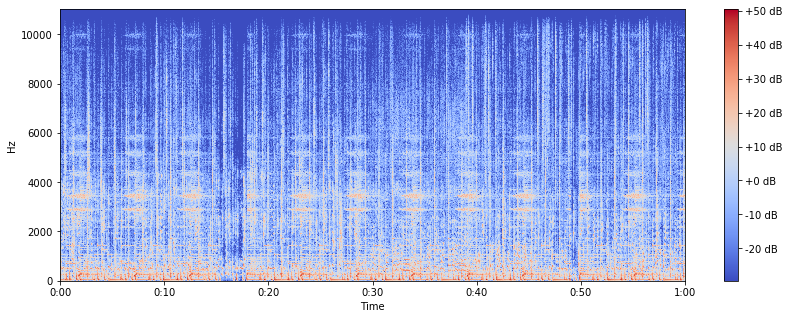

Dangerous Mindz:


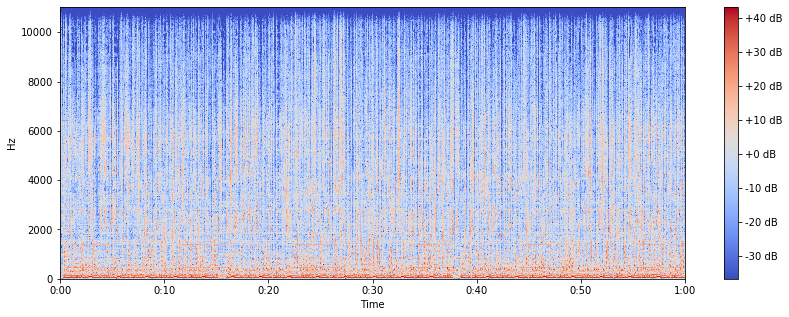

Juicy:


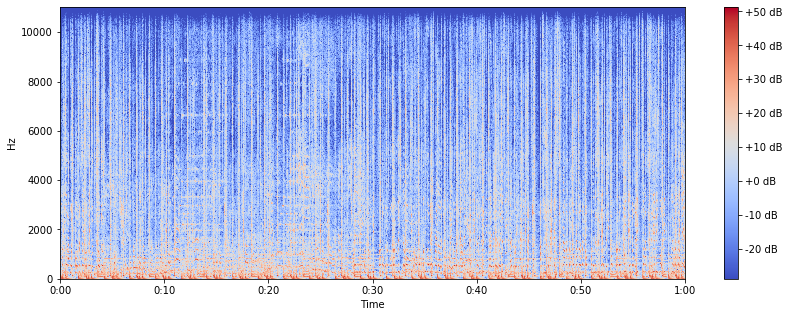

Shadowboxin':


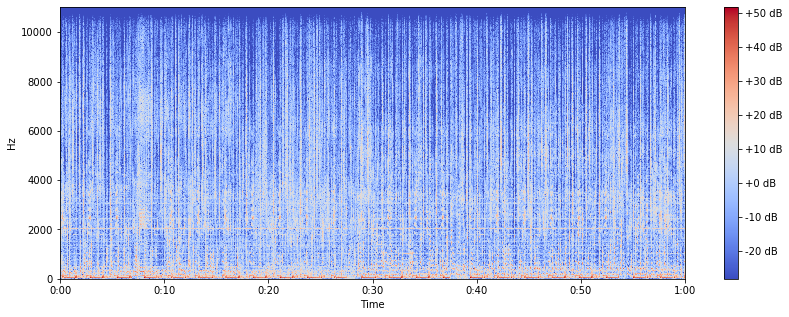

Survival of the Fittest:


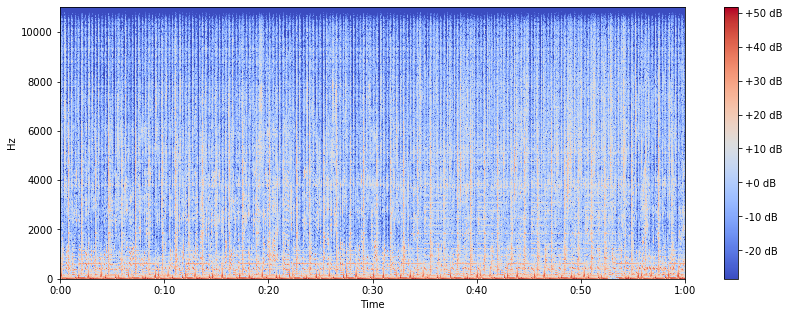

The Choice Is Yours:


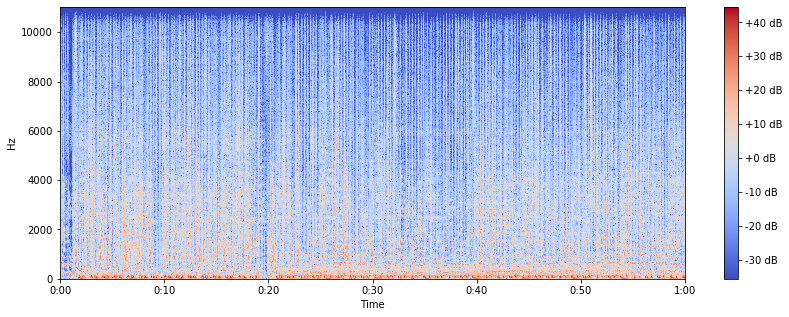

The World is Yours:


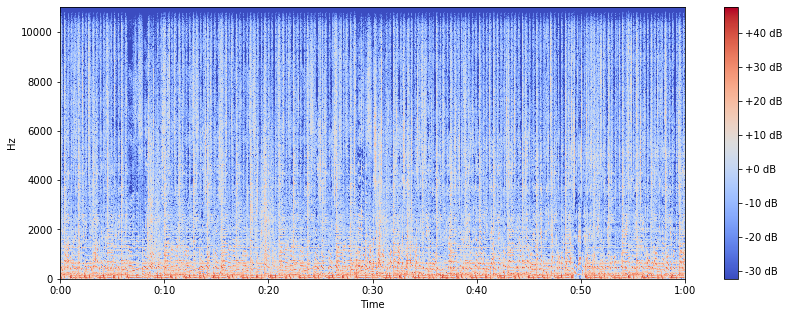

Break Ya Neck:


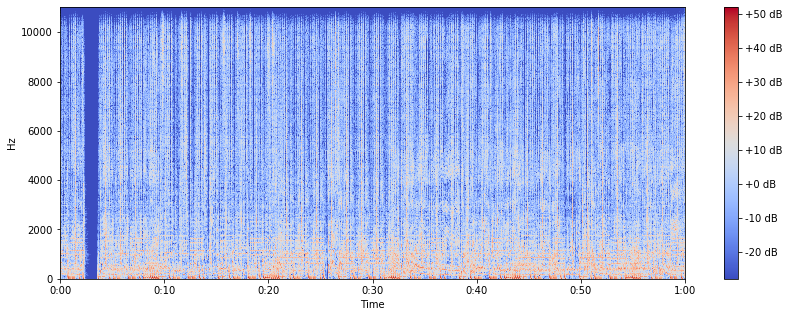

In [36]:
#spectogram for each song
for song in songs:
    x = song[0]
    sr = song[1]
    X = librosa.stft(x)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(14, 5))
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    print(song[2]+':')
    plt.colorbar(format='%+2.0f dB')
    plt.show()